In [54]:
# pandas 라이브러리 호출
import pandas as pd

In [55]:
# 코로나 데이터(csv), 하와이 코로나 데이터(csv)를 pandas 라이브러리로 읽어오기
raw_df = pd.read_csv('C:\\data\\owid-covid-data.csv')
raw_hawaii_df = pd.read_csv('C:\\data\\hawaii-covid-data.csv')

In [56]:
# 필요컬럼(iso코드, 국가, 날짜, 확진자수, 인구수) 선택
selected_columns = ["iso_code", "location", "date", "total_cases", "population"]
# 코로나 데이터에서 필요컬럼들만 추출
revised_df = raw_df[selected_columns]

In [57]:
# 국가 컬럼만 추출
locations = revised_df["location"]

In [58]:
# 국가확인
locations.unique()

array(['Afghanistan', 'Africa', 'Albania', 'Algeria', 'American Samoa',
       'Andorra', 'Angola', 'Anguilla', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Aruba', 'Asia', 'Australia', 'Austria',
       'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados',
       'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda', 'Bhutan',
       'Bolivia', 'Bonaire Sint Eustatius and Saba',
       'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'British Virgin Islands', 'Brunei', 'Bulgaria', 'Burkina Faso',
       'Burundi', 'Cambodia', 'Cameroon', 'Canada', 'Cape Verde',
       'Cayman Islands', 'Central African Republic', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Curacao',
       'Cyprus', 'Czechia', 'Democratic Republic of Congo', 'Denmark',
       'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'England', 'Equatorial Guinea', 'Eritrea',

In [59]:
# 국가가 한국인 행만 추출
kor_df = revised_df[revised_df.location == "South Korea"]
# 국가가 미국인 행만 추출
usa_df = revised_df[revised_df.location == "United States"]

In [60]:
# 한국 데이터에서 date 컬럼을 인덱스로 설정
kor_date_index_df = kor_df.set_index("date")
# 미국 데이터에서 date 컬럼을 인덱스로 설정
usa_date_index_df = usa_df.set_index("date")

In [61]:
# 한국 데이터에서 확진자수 컬럼만 추출
kor_total_cases = kor_date_index_df["total_cases"]
# 미국 데이터에서 확진자수 컬럼만 추출
usa_total_cases = usa_date_index_df["total_cases"]

In [62]:
# 2022-01-01 기준 한국 인구수 추출
kor_population = kor_date_index_df['population']['2022-01-01']
# 2022-01-01 기준 미국 인구수 추출
usa_population = usa_date_index_df['population']['2022-01-01']
kor_population, usa_population

(51815808.0, 338289856.0)

In [63]:
# 하와이 코로나 데이터에서 필요컬럼(날짜, 확진자수)만 추출
filtered_hawaii_df = raw_hawaii_df[['submission_date', 'tot_cases']]

In [64]:
# 날짜 기준으로 오름차순 정렬
sorted_hawaii_df = filtered_hawaii_df.sort_values(by='submission_date')

In [65]:
# 날짜의 데이터 타입을 datetime으로 변경하고 그 값을 date 컬럼에 저장
sorted_hawaii_df['date'] = pd.to_datetime(filtered_hawaii_df['submission_date'])

In [66]:
# date 컬럼을 기준으로 오름차순 정렬
sorted_hawaii_df.sort_values(by='date', inplace=True)

In [67]:
# date 컬럼을 인덱스로 설정 
sorted_hawaii_df.set_index('date', inplace=True)
sorted_hawaii_df

,submission_date,tot_cases
date,,
2020-01-22,01/22/2020,0
2020-01-23,01/23/2020,0
2020-01-24,01/24/2020,0
2020-01-25,01/25/2020,0
2020-01-26,01/26/2020,0
...,...,...
2022-07-17,07/17/2022,309561
2022-07-18,07/18/2022,309561
2022-07-19,07/19/2022,309561


In [68]:
# 하와이 코로나 데이터에서 확진자 수 컬럼만 추출
hawaii_total_cases = sorted_hawaii_df['tot_cases']

In [69]:
# 2022-01-01 기준 하와이 인구수 설정
hawaii_population = 1433336

In [70]:
# 하와이 인구수와 한국 인구수 비율 계산
hawaii_kor_rate = round((hawaii_population / kor_population), 3)
# 하와이 인구수와 미국 인구수 비율 계산
hawaii_usa_rate = round((hawaii_population / usa_population), 3)
hawaii_kor_rate, hawaii_usa_rate

(0.028, 0.004)

In [71]:
# 한국과 미국 데이터의 인덱스 데이터 타입이 string이므로 하와이 데이터 인덱스의 데이터 타입도 string으로 변경
hawaii_total_cases.index = hawaii_total_cases.index.astype('string')

In [72]:
# 시각화용 데이터 생성
final_hawaii_revised_df = pd.DataFrame({
    'KOR': kor_total_cases * hawaii_kor_rate,     # 하와이와 한국의 인구수 차이를 없애기 위해 비율값을 곱함
    'USA' : usa_total_cases * hawaii_usa_rate,    # 하와이와 미국의 인구수 차이를 없애기 위해 비율값을 곱함
    'HAWAII' : hawaii_total_cases
    }, index=kor_date_index_df['2022-01-01' : '2022-07-21'].index)    # 2022-01-01 부터 2022-07-21까지 범위 설정
final_hawaii_revised_df

,KOR,USA,HAWAII
date,,,
2022-01-01,17126.676,207515.440,112283
2022-01-02,17981.656,218363.592,115400
2022-01-03,17981.656,218363.592,118330
2022-01-04,17981.656,218363.592,119830
2022-01-05,17981.656,218363.592,122385
...,...,...,...
2022-07-17,525329.196,353504.820,309561
2022-07-18,525329.196,353504.820,309561
2022-07-19,525329.196,353504.820,309561


<Axes: xlabel='date'>

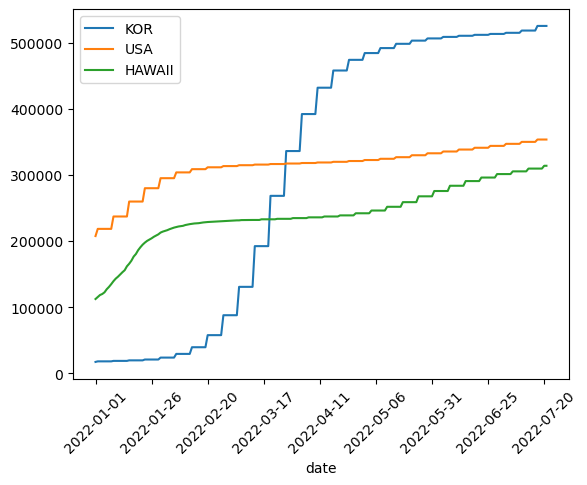

In [73]:
# plot.line 함수로 데이터 시각화
final_hawaii_revised_df.plot.line(rot=45)